## EDA - Diabetes Patients Clustering


In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib
import sys
import os
import missingno as msno
from scipy import stats

In [2]:
sys.path.append(os.path.abspath(os.path.join('../..')))
import utils
import graphs
importlib.reload(utils)
importlib.reload(graphs)

<module 'graphs' from '/home/tux/ml_proyecto_final/notebooks/graphs.py'>

In [3]:
diabetes = fetch_ucirepo(id=296)

/home/tux/ml_proyecto_final/env/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
df = diabetes.data.features

In [5]:
print(df.head(2))

        race  gender      age weight  admission_type_id  \
0  Caucasian  Female   [0-10)    NaN                  6   
1  Caucasian  Female  [10-20)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   

          medical_specialty  ...  examide  citoglipton  insulin  \
0  Pediatrics-Endocrinology  ...       No           No       No   
1                       NaN  ...       No           No       Up   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                   No                   No                        No   
1                   No                   No                        No   

  metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  
0                      No                     No     No           No  
1             

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [7]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [8]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## Missing values analysis

In [9]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


In [10]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [11]:
missing= utils.missing_table(df)
missing.head(10)

,missing_count,missing_pct
weight,98569,96.86
max_glu_serum,96420,94.75
A1Cresult,84748,83.28
medical_specialty,49949,49.08
payer_code,40256,39.56
race,2273,2.23
diag_3,1423,1.40
diag_2,358,0.35
diag_1,21,0.02
time_in_hospital,0,0.00


We can see that the top 5 columns with missing data are with values above 30%. We will be dropping these columns in the next steps. In the case of race we can drop the rows, since it represents only 2.2% of the total data.

In [12]:
print('diag_3 unique values:', df['diag_3'].nunique())

diag_3 unique values: 789


In [13]:
print('diag_2 unique values:', df['diag_2'].nunique())

diag_2 unique values: 748


In [14]:
print('diag_1 values:', df['diag_1'].nunique())

diag_1 values: 716


The different amount of values in diagnosis 2 and 3 can increase the complexity of the model, so we will drop them, we will only keep the main diagnosis information, diagnosis 1.

In [15]:
print('race values:', df['race'].unique())

race values: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


Lets see some graphs to visually understand our missing data

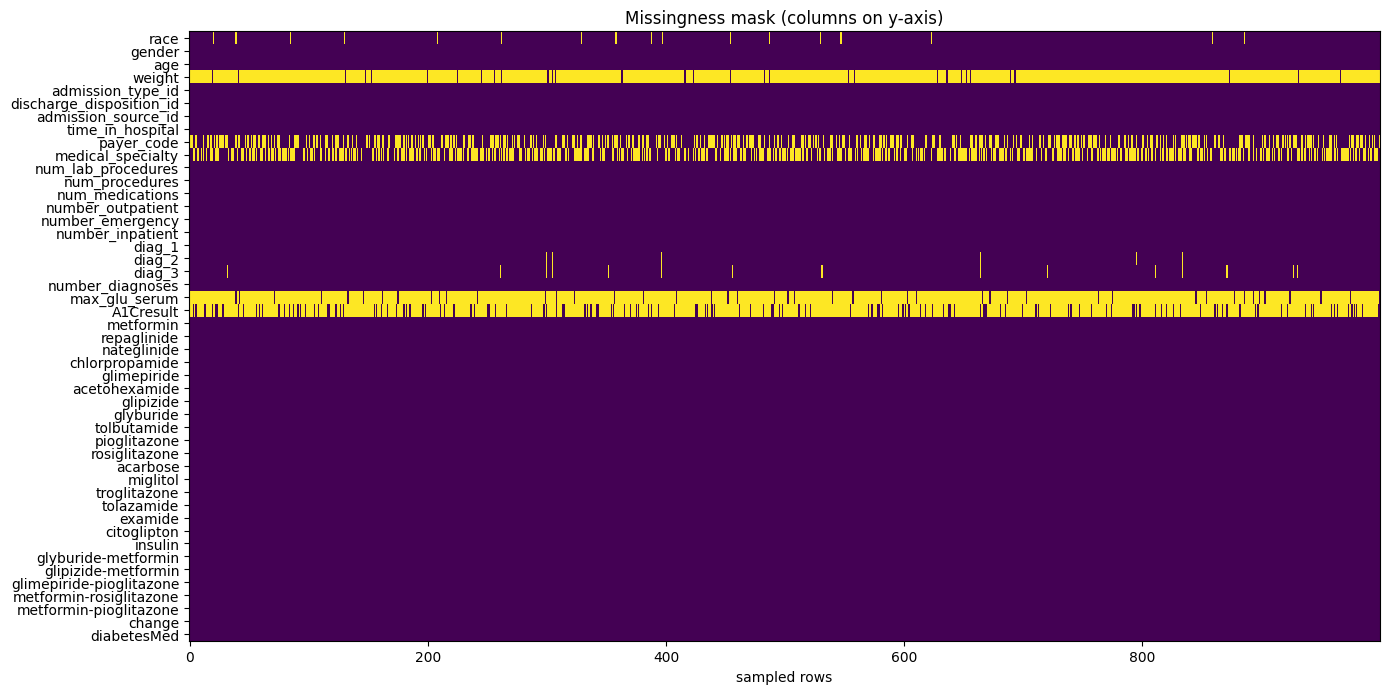

In [16]:
graphs.missing_data_distribution(df)

In [17]:
missing_cols = (
    df.isnull().sum()
    .sort_values(ascending=False)
    .head(9)
    .index
)

df_missing = df[missing_cols]

In [18]:
missing_cols

Index(['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty',
       'payer_code', 'race', 'diag_3', 'diag_2', 'diag_1'],
      dtype='object')

<Axes: >

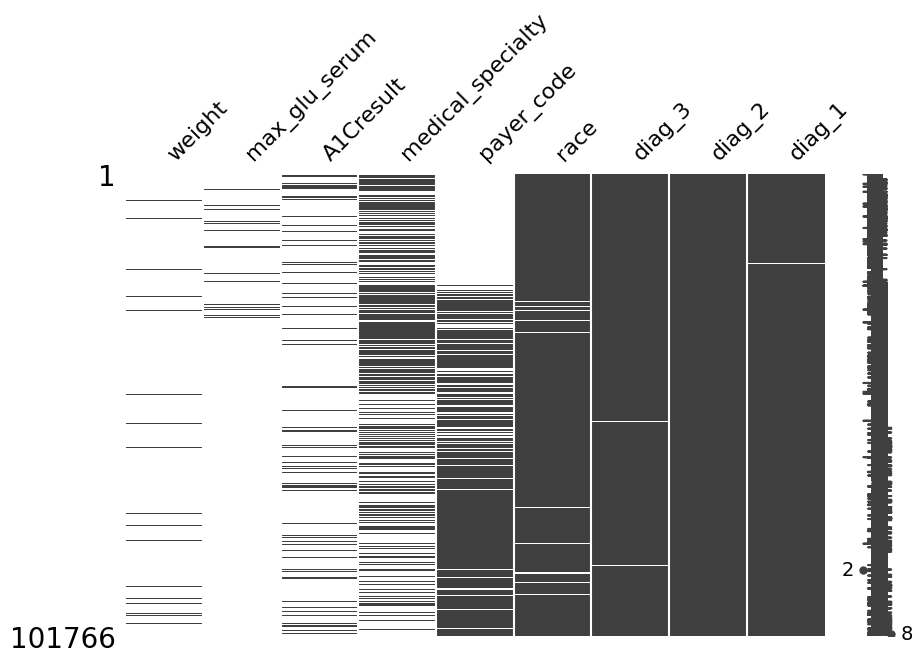

In [19]:
msno.matrix(df_missing, figsize=(10, 6))

### Now lets drop all the columns and rows to have a cleaner dataframe

In [ ]:
cols_to_drop = [
    'weight', 
    'max_glu_serum', 
    'A1Cresult', 
    'medical_specialty',
    'payer_code', 
    'diag_3', 
    'diag_2'
    ]

In [ ]:
df_clean = df.drop(columns=cols_to_drop)

In [22]:
df_clean = df_clean.dropna()

In [23]:
df_clean.isnull().sum().sum()

np.int64(0)

In [24]:
df_clean.shape

(99474, 40)

In [32]:
df_clean.diag_1.nunique()

714

In [31]:
df_clean.diag_1.unique()[:20]

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', 'V57', '189',
       '786', '427'], dtype=object)

Since there are 714 categories for the primary diagnosis, we will encode groups of diagnoses based on the ICD-9 codes. According to the accompaning documentation, the first digit of the code indicates the general category of the disease.